<a href="https://colab.research.google.com/github/VrushaliSapkal/Data_mining_Assignments/blob/main/DMW_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
# Importing the dataset
data = pd.read_csv('/content/driver-data.csv')


In [4]:
# showing first 10 sample record
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
# missing value 
data.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

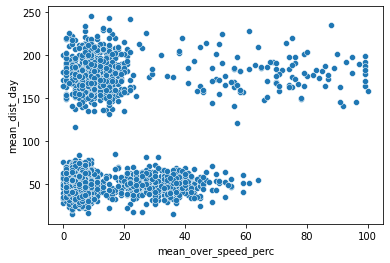

In [14]:
import seaborn as sns
sns.scatterplot(x='mean_over_speed_perc', y='mean_dist_day', data=data)

In [15]:
feature=data.drop('id',axis=1)

In [21]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=4)
kmeans.fit(feature)

KMeans(n_clusters=4)

In [22]:
#We will use the command cluster_centers to determine the cluster_center vectors
kmeans.cluster_centers_

array([[ 5.04048244e+01,  3.23653396e+01, -1.55431223e-15],
       [ 1.77835096e+02,  7.02884615e+01,  1.00000000e+00],
       [ 1.80343118e+02,  1.05201149e+01,  1.00000000e+00],
       [ 4.99926325e+01,  5.20447169e+00,  5.19029264e-15]])

In [23]:
#We can check the kmeans labels and its length as well
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 2 2 2]
4000


In [24]:
#We have 4000 rows in our data and now we have 4000 labels to go with it
#Now lets check how many unique drivers we have in cluster 1 and 2
unique,counts= np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 427, 1: 104, 2: 696, 3: 2773}


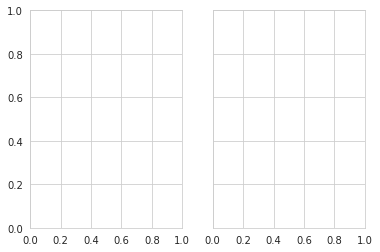

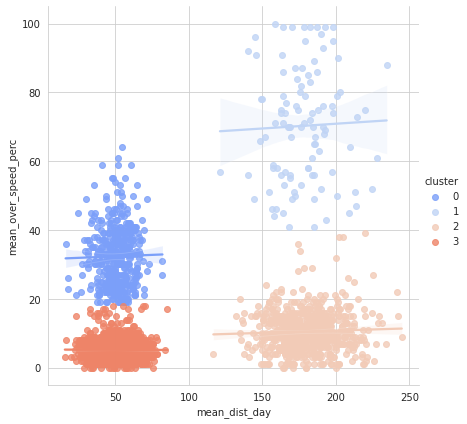

In [25]:
#Now lets save the labels with our feature data
feature['cluster']=kmeans.labels_

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc', data=feature, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=True)